In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

In [2]:
circ = QuantumCircuit(2)
for i in range(2): circ.h(i)

In [3]:
circ.draw()

In [4]:
backend = Aer.get_backend('statevector_simulator')

In [5]:
job = execute(circ, backend)
result = job.result()
output = result.get_statevector(circ, decimals=3)
output

array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])

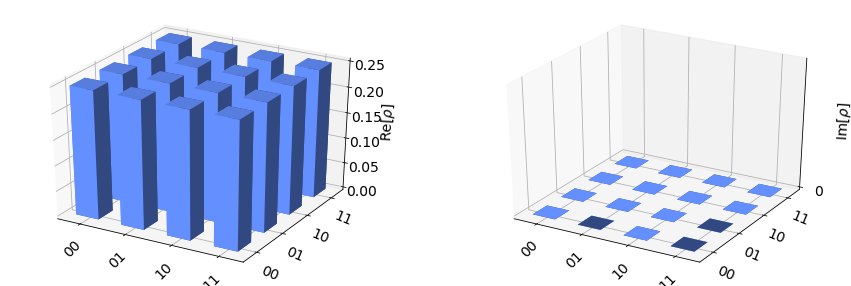

In [6]:
from qiskit.visualization import plot_state_city
plot_state_city(output)

In [7]:
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()
output = result.get_unitary(circ, decimals=3)
output

array([[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
       [ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
       [ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
       [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j]])

In [8]:
meas = QuantumCircuit(2, 2)
meas.barrier(range(2))
meas.measure(range(2), range(2))
qc = circ + meas
qc.draw()

In [9]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts(qc)
counts

{'01': 280, '00': 241, '10': 240, '11': 263}

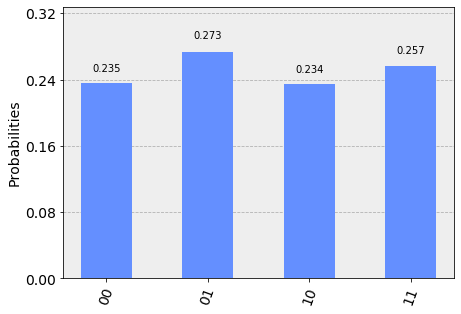

In [10]:
#Check that the measure change a bit the result
from qiskit.visualization import plot_histogram
plot_histogram(counts)